INSTALLING THE REQUIRED LIBRARIES



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

DATA PRE-PROCESSING


In [ ]:
df=pd.read_csv("/content/city_day.csv",encoding='cp1252')
#Reading the csv file into a dataframe df and making a copy of the dataframe


df_aqi=df.copy()
print(f'There are {df_aqi.shape[0]} rows and {df_aqi.shape[1]} columns')


There are 29531 rows and 16 columns


DATA UNDERSTANDING

In [ ]:
df.head()
# Loading the dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.isnull().sum()
#to find out the missing values in the dataset

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df.describe()
#used to check mean, standard deviation, min values and max value present in the data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

Missing Null Values


In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
nullvalues
# Checking all null values

Xylene        18109
PM10          11140
NH3           10328
Toluene        8041
Benzene        5623
AQI            4681
AQI_Bucket     4681
PM2.5          4598
NOx            4185
O3             4022
SO2            3854
NO2            3585
NO             3582
CO             2059
City              0
Date              0
dtype: int64

In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


we do imputation using median value for numerical data

In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))

In [ ]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df1.corr().AQI.sort_values(ascending = False)

AQI        1.000000
CO         0.650475
PM2.5      0.633654
NO2        0.531952
SO2        0.454182
PM10       0.447686
NO         0.438039
NOx        0.436282
Toluene    0.288749
O3         0.199100
Xylene     0.186991
NH3        0.097916
Benzene    0.052027
Name: AQI, dtype: float64

We find that CO, PM2.5 and NO2 affects the air quality index most.

In [ ]:
# adding all the features with corr less than 0.4
df1['B_X_O3_NH3'] = df1['Benzene'] +\
df1['Xylene'] + df1['O3'] + df1['NH3']
df1['ParticulateMatters'] = df1['PM2.5'] + df1['PM10']
corr_with_AQI = df1.corr().AQI.sort_values(ascending = False)
corr_with_AQI

AQI                   1.000000
CO                    0.650475
PM2.5                 0.633654
ParticulateMatters    0.609073
NO2                   0.531952
SO2                   0.454182
PM10                  0.447686
NO                    0.438039
NOx                   0.436282
Toluene               0.288749
B_X_O3_NH3            0.221614
O3                    0.199100
Xylene                0.186991
NH3                   0.097916
Benzene               0.052027
Name: AQI, dtype: float64

In [ ]:
df1.drop('Benzene', axis=1, inplace=True)
df1.drop('Xylene', axis=1, inplace=True)
df1.drop('O3', axis=1, inplace=True)
df1.drop('NH3', axis=1, inplace=True)

Creating two new columns of Vehicular & Industrial Pollution for the purpose of data visualization & finding inferences

In [ ]:
df1['Vehicular_Pollution'] = df1['PM2.5']+df1['PM10']+df1['NO']+df1['NO2']+df1['NOx']+df1['CO']
df1['Industrial_Pollution'] = df1['SO2']+df1['B_X_O3_NH3']

DATA VISUALIZATION

In [ ]:
# Sum of pollution
import plotly.express as px

df = df1.drop(columns = ['Date', 'AQI', 'Vehicular_Pollution', 'Industrial_Pollution', 'ParticulateMatters']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

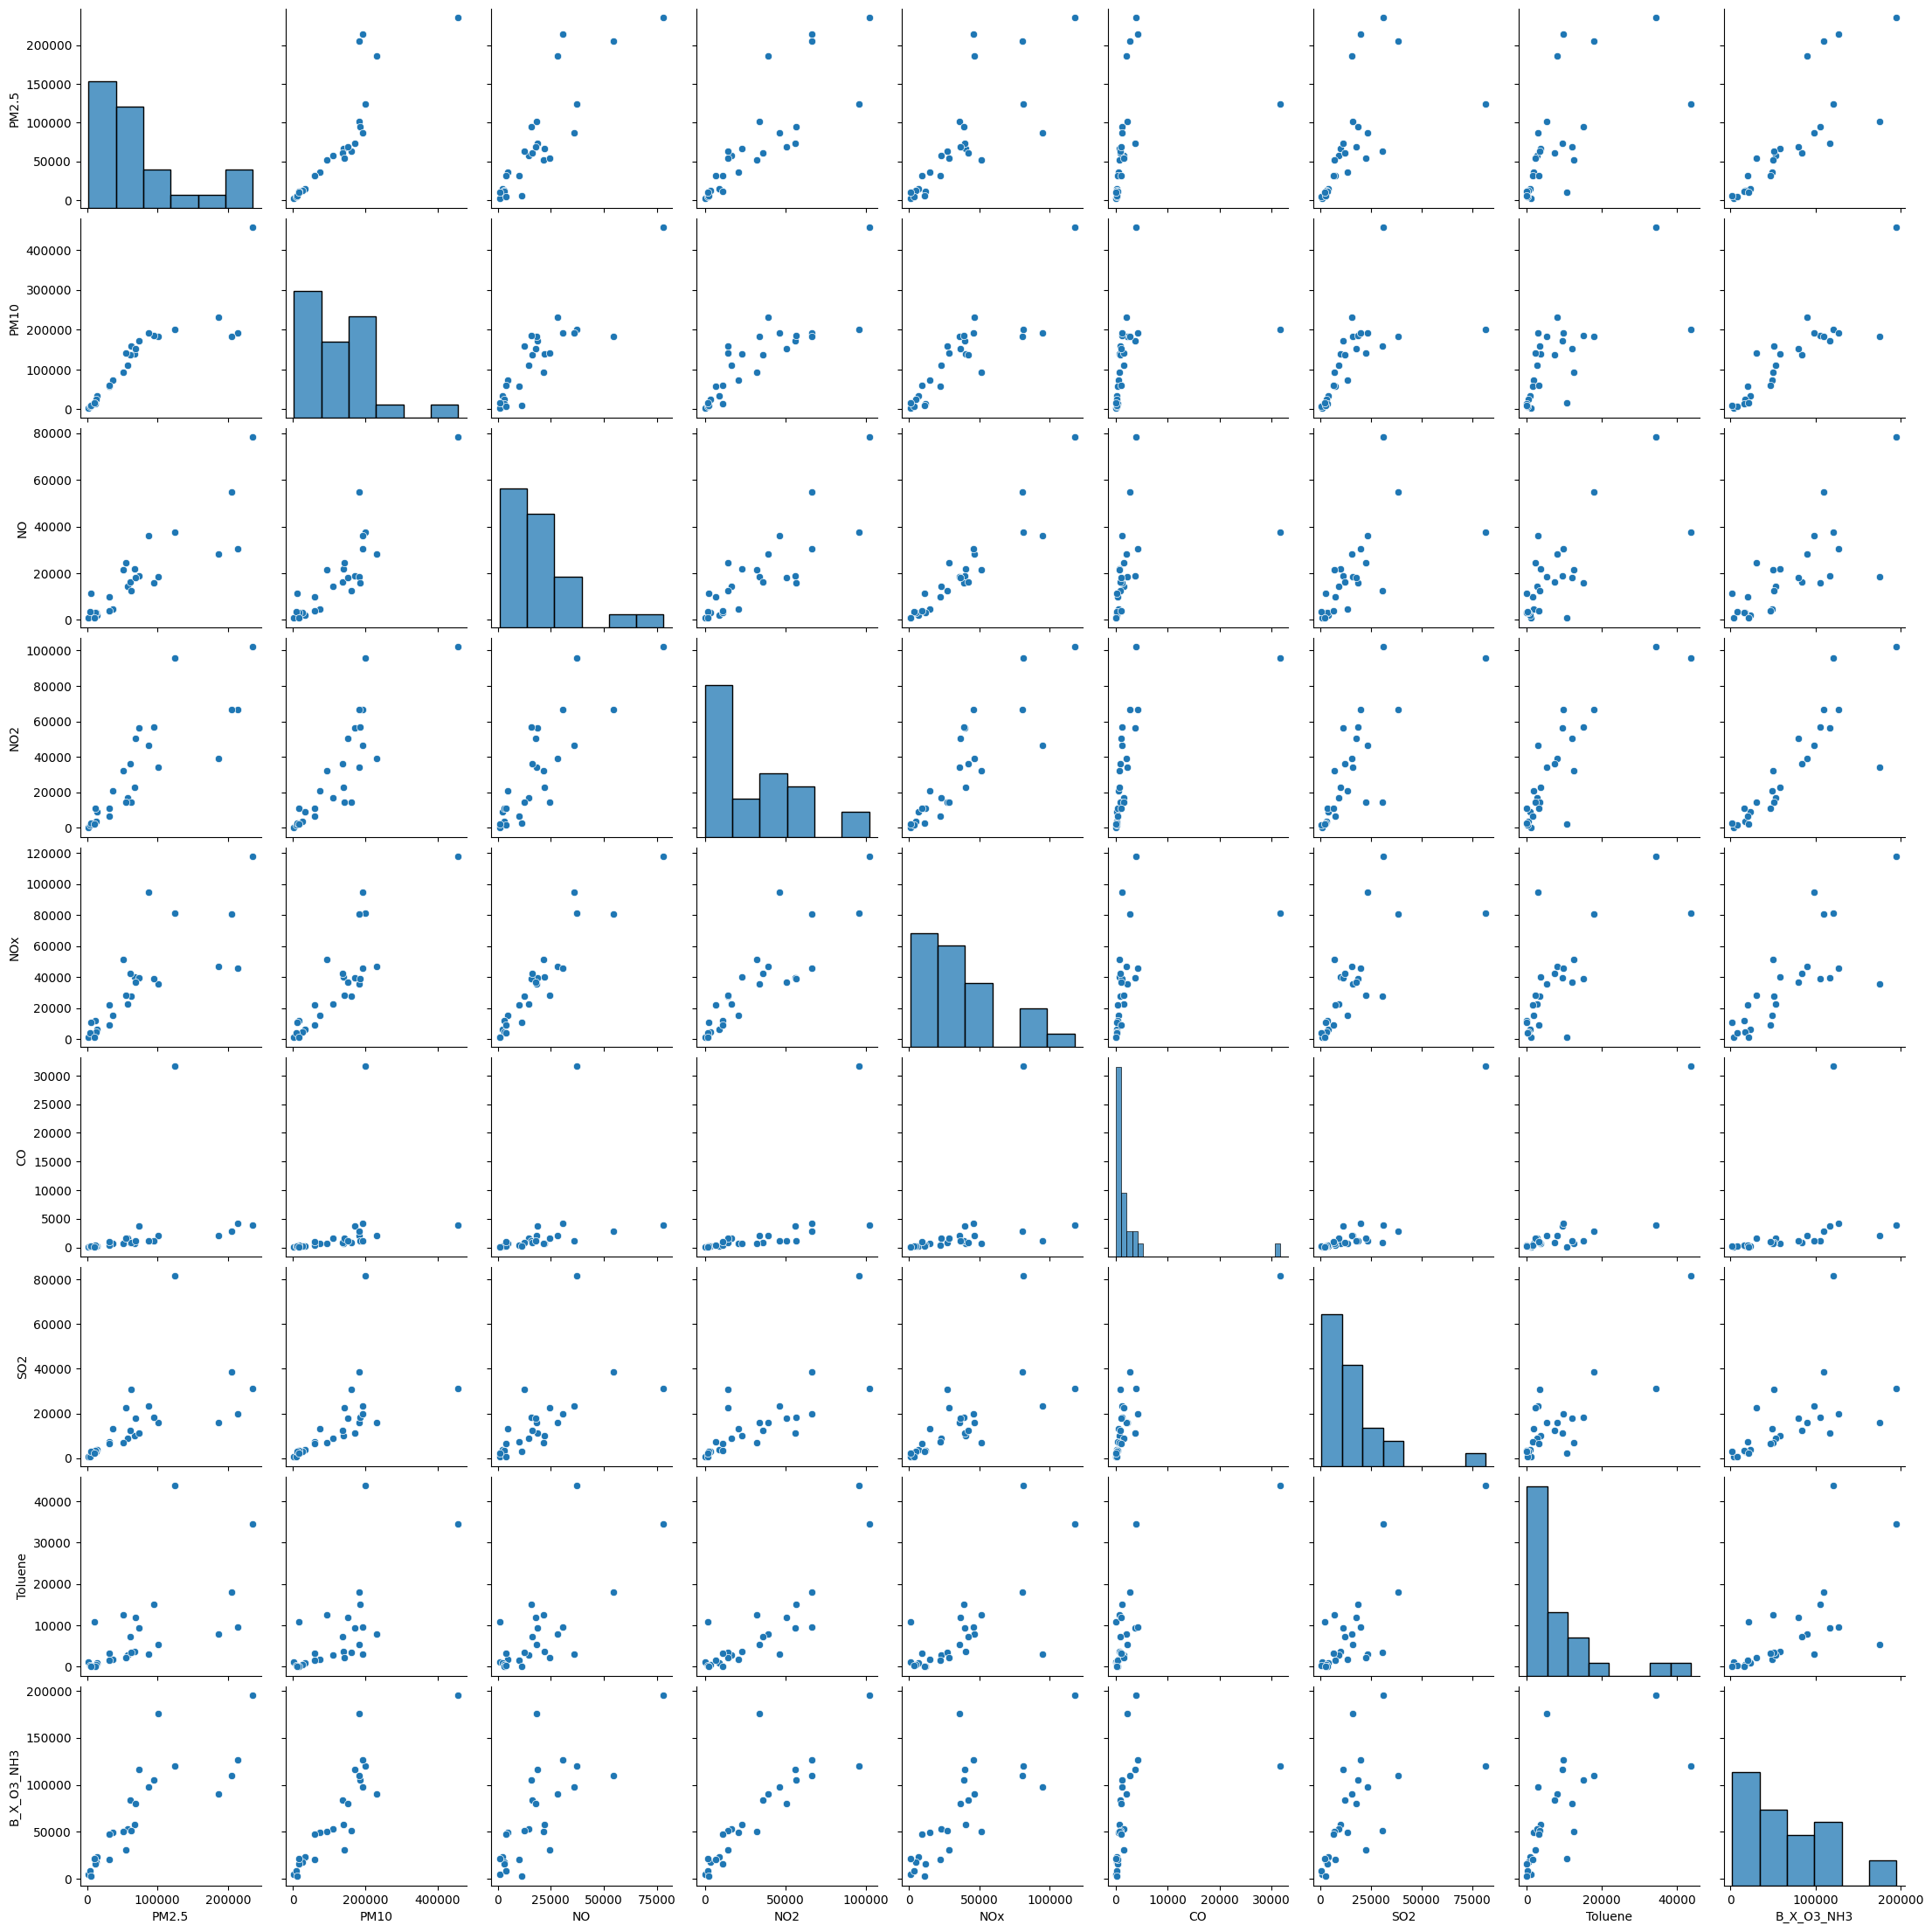

In [ ]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'AQI vs PM2.5')

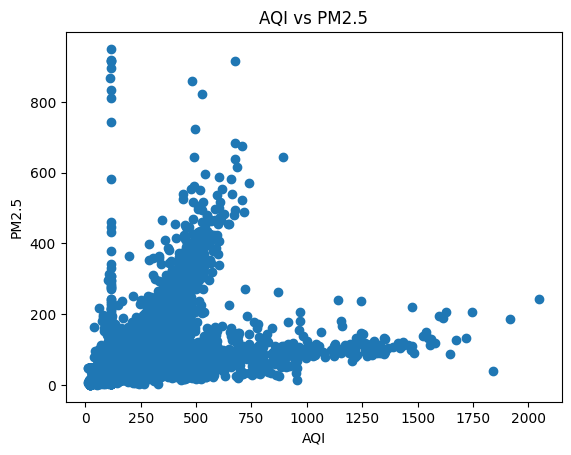

In [ ]:
plt.scatter(df1['AQI'], df1['PM2.5'])
plt.xlabel('AQI')
plt.ylabel('PM2.5')
plt.title('AQI vs PM2.5')

Text(0.5, 1.0, 'Pollutants Levels over Time')

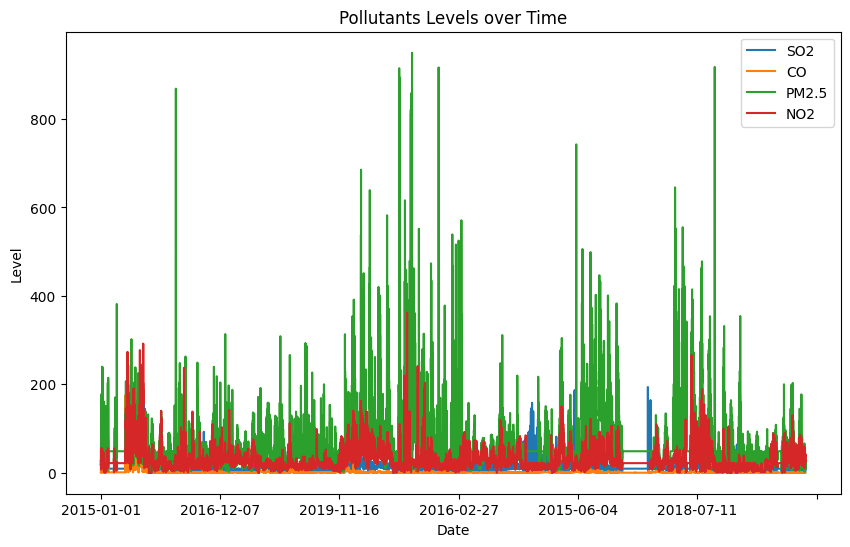

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df1.plot(x='Date', y=['SO2', 'CO', 'PM2.5', 'NO2'], ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Level')
ax.set_title('Pollutants Levels over Time')

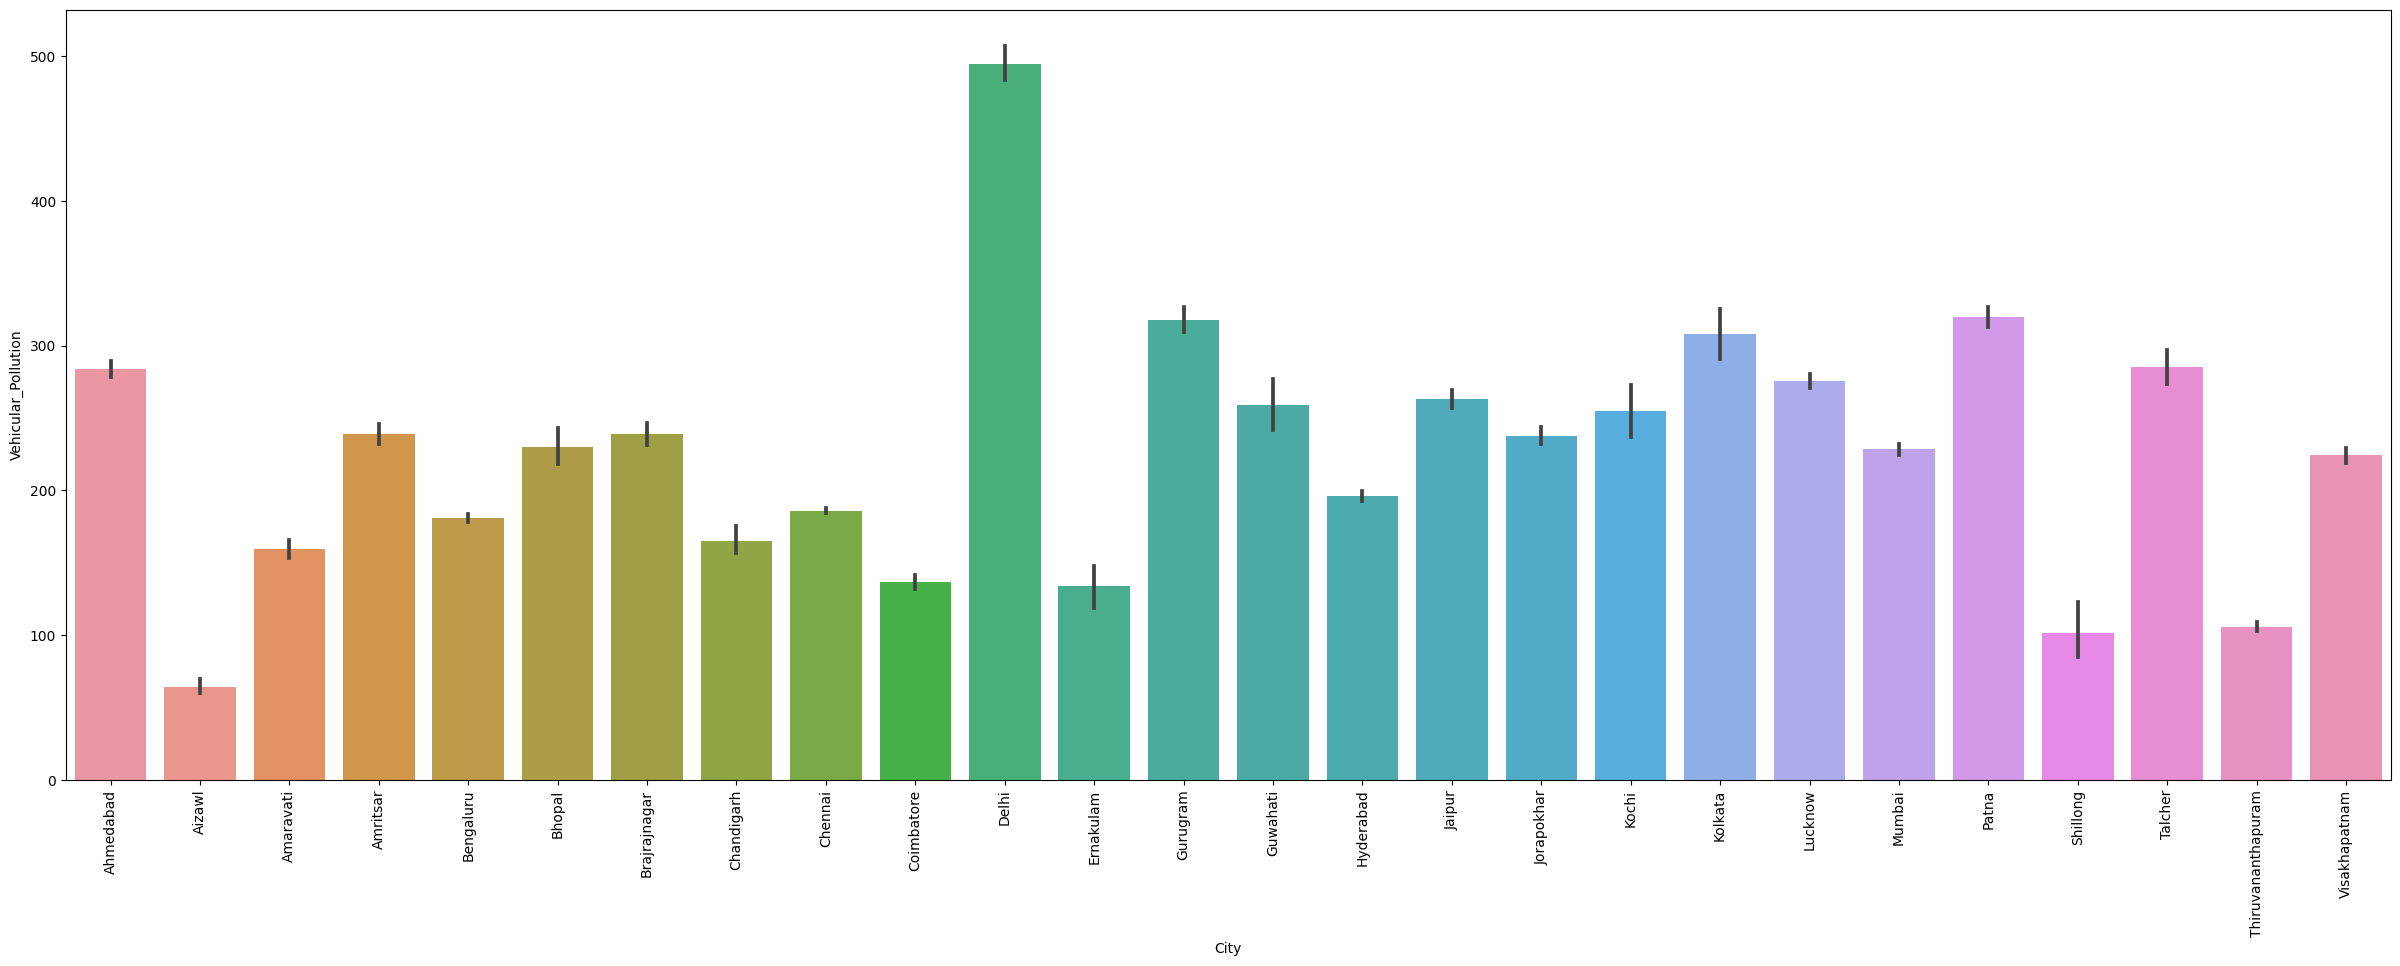

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Vehicular_Pollution',data=df1);

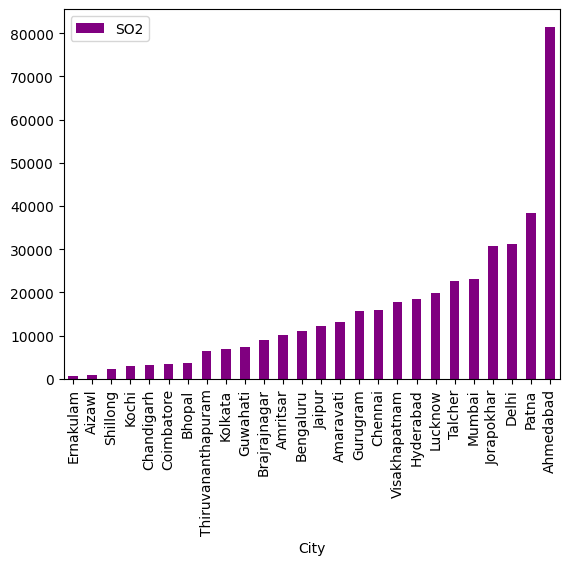

In [ ]:
df[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

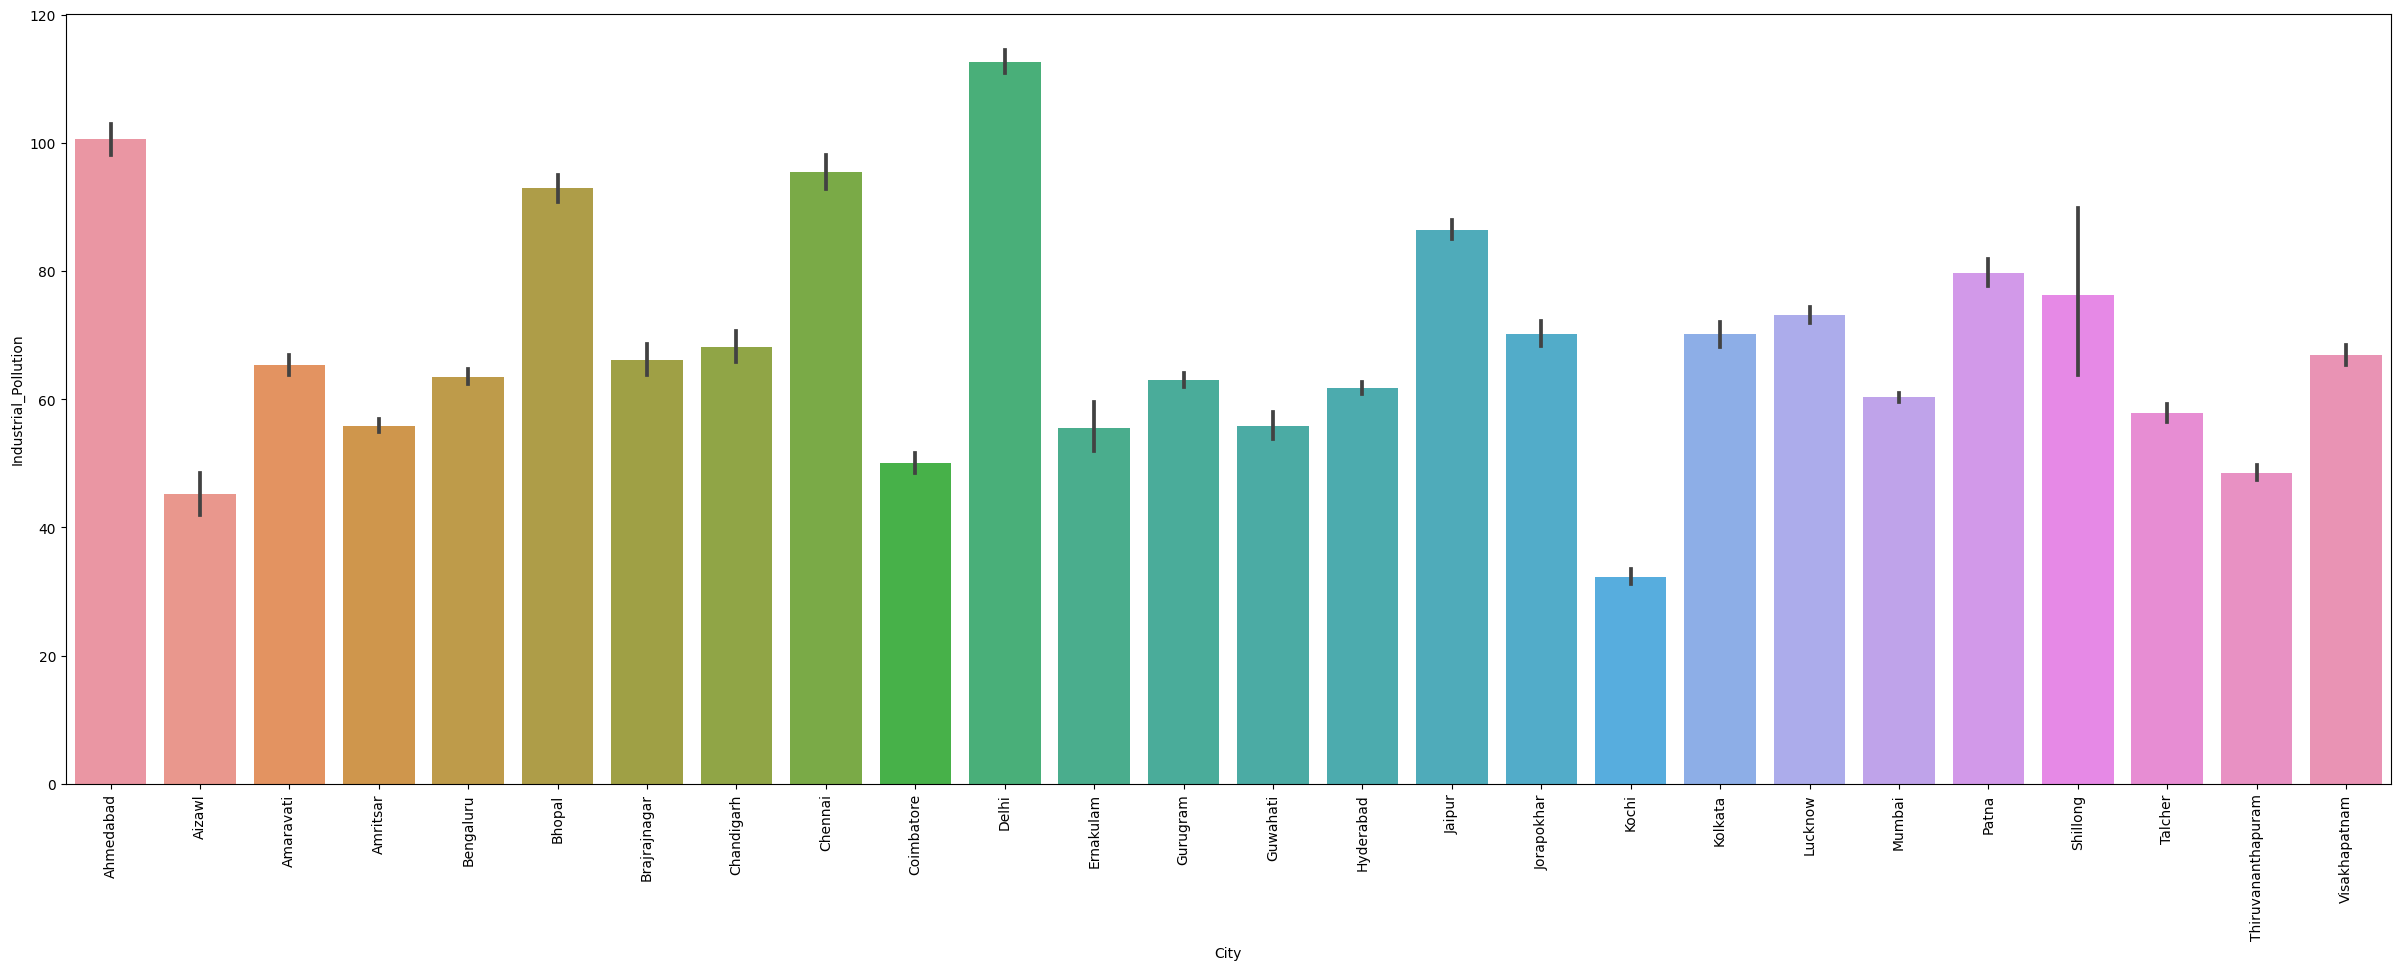

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='Industrial_Pollution',data=df1);

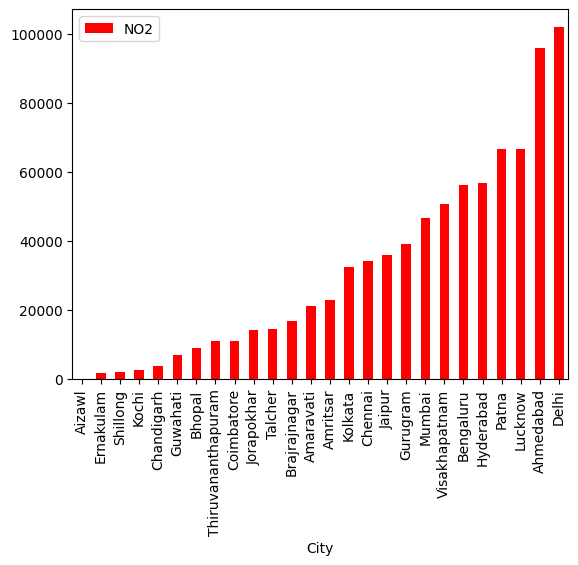

In [ ]:
df[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2').plot.bar(color='red')
plt.show()
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

In [ ]:
import datetime
df1.Date = df1.Date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df1 = df1.sort_values(by = 'Date')

In [ ]:
print('Date starts from {}, and ends in {}'.format(df1.Date.min().strftime('%Y-%m-%d'), df1.Date.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df1['AQI_Range'] = df1['AQI'].apply(AQI_Range)
df1.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,City,Date,PM2.5,PM10,NO,NO2,NOx,CO,SO2,Toluene,AQI,AQI_Bucket,B_X_O3_NH3,ParticulateMatters,Vehicular_Pollution,Industrial_Pollution,AQI_Range
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,0.92,27.64,0.02,118.0,NaN,149.21,144.25,181.46,176.85,Poor
7834,Chennai,2015-01-01,48.57,95.68,16.30,15.39,22.68,1.17,9.20,2.97,118.0,NaN,17.09,144.25,199.79,26.29,Poor
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,15.20,9.25,24.86,472.0,Severe,99.73,921.20,1152.54,108.98,Hazardous
19846,Lucknow,2015-01-01,48.57,95.68,2.11,13.46,4.57,12.15,169.57,3.93,118.0,NaN,44.10,144.25,176.54,213.67,Poor
21855,Mumbai,2015-01-01,48.57,95.68,9.89,21.69,27.38,0.00,9.16,0.00,118.0,NaN,46.69,144.25,203.21,55.85,Poor


In [ ]:
df1['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Poor              13510
Moderate           8224
Unhealthy          2781
Very unhealthy     2337
Good               1341
Hazardous          1338
Name: AQI_Range, dtype: int64

Splitting the dataset into Dependent and Independent columns¶


In [ ]:
X = df1[['CO','PM2.5','NO2','SO2', 'PM10', 'NO', 'NOx', 'Toluene']]
Y = df1['AQI_Range']
X.head(5)

,CO,PM2.5,NO2,SO2,PM10,NO,NOx,Toluene
0,0.92,48.57,18.22,27.64,95.68,0.92,17.15,0.02
7834,1.17,48.57,15.39,9.20,95.68,16.30,22.68,2.97
10229,15.20,313.22,36.39,9.25,607.98,69.16,110.59,24.86
19846,12.15,48.57,13.46,169.57,95.68,2.11,4.57,3.93
21855,0.00,48.57,21.69,9.16,95.68,9.89,27.38,0.00


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(23624, 8) (5907, 8) (23624,) (5907,)


CLASSIFICATION ALGORITHMS

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

Logistic Regression


In [ ]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train, Y_train)

In [ ]:
#predict on train
train_pred = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_pred))


Model accuracy on train is:  0.5137995259058584


In [ ]:
#predict on test
test_pred = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred))
print('-'*50)


Model accuracy on test is:  0.5083798882681564
--------------------------------------------------


Logistic Regression hence is not a good fit since it is best for Binary Classification

Decision Tree Classifier

In [ ]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train,Y_train)

In [ ]:
#predict on train
train_pred1 = DT2.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_pred1))

Model accuracy on train is:  0.9990687436505249


In [ ]:
#predict on test
test_pred1 = DT2.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred1))

Model accuracy on test is:  0.7323514474352463


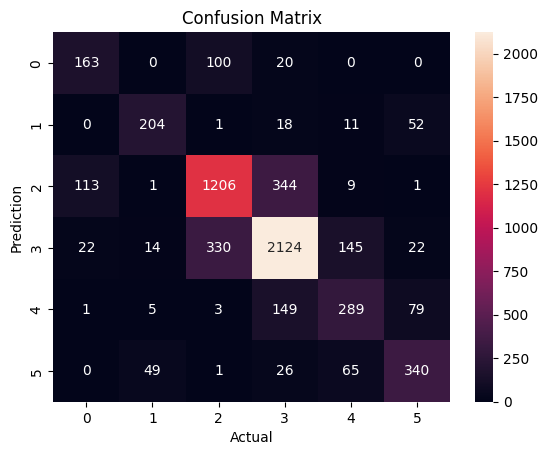

In [ ]:
cm = confusion_matrix(Y_test, test_pred1)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Overfitting

K-Nearest Neighbours


In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train
train_pred2 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_pred2))

Model accuracy on train is:  0.8264476803250931


In [ ]:
#predict on test
test_pred2 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_pred2))

Model accuracy on test is:  0.7611308616895209


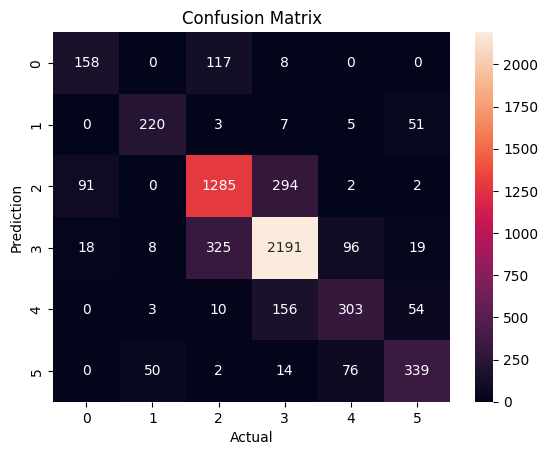

In [ ]:
cm = confusion_matrix(Y_test, test_pred2)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Support Vector Machine

In [ ]:
cls=SVC().fit(X_train,Y_train)
svmpred=cls.predict(X_test)

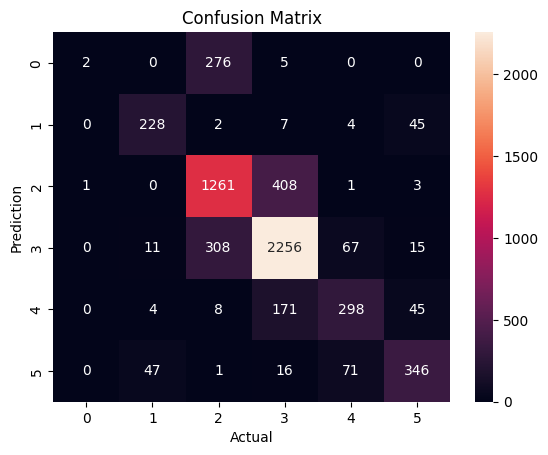

In [ ]:
cm = confusion_matrix(Y_test, svmpred)
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
svmpred=cls.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, svmpred))

Model accuracy on train is:  0.7515238740264139


In [ ]:
svmpred=cls.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, svmpred))

Model accuracy on test is:  0.7433553411207042


In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation and print the mean scores
svm_scores = cross_val_score(cls, X_train, Y_train, cv=5)
dt_scores = cross_val_score(DT2, X_train, Y_train, cv=5)
knn_scores = cross_val_score(KNN, X_train, Y_train, cv=5)

print("SVM scores:", svm_scores)
print("Mean SVM score:", svm_scores.mean())
print("Decision Tree scores:", dt_scores)
print("Mean Decision Tree score:", dt_scores.mean())
print("KNN scores:", knn_scores)
print("Mean KNN score:", knn_scores.mean())

SVM scores: [0.7405291  0.73671958 0.75492063 0.75301587 0.74809483]
Mean SVM score: 0.746656004014175
Decision Tree scores: [0.72677249 0.71936508 0.72910053 0.73100529 0.73772227]
Mean Decision Tree score: 0.7287931311013445
KNN scores: [0.76994709 0.75809524 0.76338624 0.77037037 0.76227773]
Mean KNN score: 0.764815334507121


Data Imbalance

In [ ]:
from collections import Counter
print('Classes and number of values in trainset',Counter(Y_train))

Classes and number of values in trainset Counter({'Poor': 10853, 'Moderate': 6550, 'Unhealthy': 2255, 'Very unhealthy': 1856, 'Good': 1058, 'Hazardous': 1052})


In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X2_train,Y2_train = oversample.fit_resample(X_train,Y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(Y2_train))

Classes and number of values in trainset after SMOTE: Counter({'Moderate': 10853, 'Unhealthy': 10853, 'Poor': 10853, 'Good': 10853, 'Very unhealthy': 10853, 'Hazardous': 10853})


In [ ]:
X2_test,Y2_test = oversample.fit_resample(X_test,Y_test)
print('Classes and number of values in trainset after SMOTE:',Counter(Y2_test))

Classes and number of values in trainset after SMOTE: Counter({'Poor': 2657, 'Moderate': 2657, 'Unhealthy': 2657, 'Very unhealthy': 2657, 'Hazardous': 2657, 'Good': 2657})


In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X2_train,Y2_train)
#predict on train
train_pred2 = KNN.predict(X2_train)
#accuracy on train
print("Model accuracy after solving data imbalance: ", accuracy_score(Y2_train, train_pred2))

Model accuracy after solving data imbalance:  0.9335053287877392
